In [1]:
import time
import warnings
warnings.filterwarnings("ignore")

### 1. Load the data using read_csv function from pandas package

In [2]:
import pandas as pd

df = pd.read_csv('train.csv', encoding='utf8')
df.head()

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0


### 2. Get the comments into a list, for easy text cleanup and manipulation

In [3]:
comment_text = df['comment_text'].to_list()

### 3. Cleanup:

In [4]:
# 1. Using regular expressions, remove IP addresses

import re

rule_ip = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

comment_text = [re.sub(rule_ip, '', text) for text in comment_text]

In [5]:
# 2. Using regular expressions, remove URLs

rule_url = ("((http|https|http://www.|https://www.|www.))" +
             "[a-zA-Z0-9@:%._\\+~#?&//=]" +
             "{2,256}\\.[a-z]" +
             "{2,6}\\b([-a-zA-Z0-9@:%" +
             "._\\+~#?&//=]*)")

comment_text = [re.sub(rule_url, '', text) for text in comment_text]

In [6]:
# 3. Normalize the casing

comment_text = [text.lower() for text in comment_text]

In [7]:
# 4. Tokenize using word_tokenize from NLTK

from nltk.tokenize import word_tokenize

comment_text_tokens = [word_tokenize(text) for text in comment_text]

In [8]:
# 5. & 6. Remove stop words and punctuation

from nltk.corpus import stopwords
import string

sw = stopwords.words('english')
punc = list(string.punctuation)
sw_custom = ["must", "would", 'could', "'s", "n't", "'m", "'re", "'ve", "'ll", "'d", "''", '``','...','•','—',]

print(sw, "\n\n", punc, "\n\n", sw_custom)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
sw_punc = sw + punc + sw_custom

comment_text_cleaned = []
for item in comment_text_tokens:
    cleaned_text = [word for word in item if ((word not in sw_punc and word.isascii()) and not word.isnumeric())]
    comment_text_cleaned.append(cleaned_text)

In [10]:
# Let us check if any non-alphabatic characters are present in cleaned text data

comment_text_check = []
for item in comment_text_cleaned:
    for word in item:
        if not word.isalpha():
            comment_text_check.append(word)
print(comment_text_check)

['drama-prone', 'ludwigs2', '1992.', 'b.', '2010.', 'non-profit', 'k.', 'deceased/former', 'yes/', 'e.g', 'mention.', '==', '150,000', '==', 'titt-fucking', '|talk', '22:56', '=19680608', '=rgcxaaaaibaj', '=mweeaaaaibaj', '=2025,668035', '=7442', '=1bf779fbde1fec4673e3ec6b631deb7f', 'as-yet-uncomfirmed-by-the-bbc', "y'know", '....', '15:47', "'personal", 'his/her', 'source.', 'nominations/grootegeluk', 'nominations/giovan', 're-reviews', 'me/breathe', 'isp-issued', 'isp-issued', 'indian_name', 'stub-sorting', 'uk-struct-stub', 'uk-geo-stub', 'struct-stub', '|hello', '00:32', '65th', '65th', 'col.', '2.', 'col.', '3.', 'ee.uu', '..', 'it.', '08:57', '90/91', '1990.', '1985.', '..', '10+', 'recently-filed', 'arbitration/requests', 'arbitration/requests', 'option-shift-hyphen', 'non-english', 'non-english', 'lot.', 'and/or', 'season_2.3a_2006', 'vs.', 'vs.', 'talkie-talkie', 're-reading', '7:22', 'rock/heavy', 'sino-tibetans', 'u.s.', '4.', '5.', 'elf-masher', '.....', 'language/wikipedia

### We can see from above  output that we need to perform following additional task for more text cleaning:

In [11]:
comment_text_cleaned1 = []
for item in comment_text_cleaned:
    cleaned_text = re.sub('[-+_/]', ' ', " ".join(item))
    cleaned_text = re.sub("[.,|:='~^0-9\\\]", "", cleaned_text)
    comment_text_cleaned1.append(cleaned_text)

In [12]:
comment_text_check = []

for item in comment_text_cleaned1:
    for word in word_tokenize(item):
        if not word.isalpha():
            comment_text_check.append(word)
print(comment_text_check)

[]


In [13]:
# 7. Define a function to perform all these steps, you’ll use this later on the actual test set

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

sw_custom = ["must", "would", 'could', "'s", "n't", "'m", "'re", "'ve", "'ll", "'d", "''", '``','...','•','—',]
sw_punc = stopwords.words('english') + list(string.punctuation) + sw_custom
   
def clean_text(text):
    # Using regular expressions, remove IP addresses
    rule_ip = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    text_data_ip_rem = re.sub(rule_ip, '', text)

    # Using regular expressions, remove URLs
    rule_url = ("((http|https|http://www.|https://www.|www.))" +
                 "[a-zA-Z0-9@:%._\\+~#?&//=]" +
                 "{2,256}\\.[a-z]" +
                 "{2,6}\\b([-a-zA-Z0-9@:%" +
                 "._\\+~#?&//=]*)")
    text_data_ip_url_rem = re.sub(rule_url, '', text_data_ip_rem)

    # Normalize the casing
    text_data_normalized = text_data_ip_url_rem.lower()

    # Tokenize using word_tokenize from NLTK
    text_data_tokens = word_tokenize(text_data_normalized)

    # Remove stopwords and punctuations
    text_data_sw_removed = [word for word in text_data_tokens 
                         if ((word not in sw_punc and word.isascii()) and not word.isnumeric())]

    # Further cleaning text data
    text_data_string = " ".join(text_data_sw_removed)
    text_data_string1 = re.sub('[-+_/]', ' ', text_data_string)
    text_data_cleaned = re.sub("[.,|:='~^0-9\\\]", "", text_data_string1)
    return text_data_cleaned

### 4. Using a counter, find the top terms in the data.

In [14]:
import nltk

comment_text_cleaned_merged = []
for item in comment_text_cleaned1:
    comment_text_cleaned_merged = comment_text_cleaned_merged + item.split()

comment_freq = nltk.FreqDist(comment_text_cleaned_merged)

In [15]:
comment_freq.most_common(200)

[('article', 1732),
 ('page', 1530),
 ('wikipedia', 1443),
 ('talk', 1212),
 ('please', 1043),
 ('ass', 990),
 ('fuck', 908),
 ('one', 879),
 ('like', 845),
 ('also', 658),
 ('see', 631),
 ('think', 630),
 ('know', 596),
 ('edit', 581),
 ('people', 554),
 ('use', 554),
 ('name', 544),
 ('may', 534),
 ('articles', 493),
 ('time', 488),
 ('user', 439),
 ('thanks', 436),
 ('even', 404),
 ('well', 403),
 ('deletion', 394),
 ('information', 393),
 ('make', 391),
 ('good', 379),
 ('suck', 375),
 ('get', 369),
 ('image', 369),
 ('want', 364),
 ('mexicans', 362),
 ('editing', 353),
 ('help', 350),
 ('wp', 347),
 ('way', 341),
 ('pages', 339),
 ('edits', 338),
 ('thank', 337),
 ('first', 334),
 ('new', 327),
 ('sources', 326),
 ('need', 310),
 ('say', 308),
 ('source', 304),
 ('many', 303),
 ('really', 301),
 ('deleted', 300),
 ('used', 285),
 ('fucking', 283),
 ('work', 281),
 ('section', 280),
 ('go', 276),
 ('find', 272),
 ('discussion', 267),
 ('right', 266),
 ('take', 264),
 ('look', 264),

In [16]:
contextual_stop_words = ['article', 'page', 'pages', 'wikipedia', 'wiki', 'talk', 'please', 'also', 'may', 'edit', 'edits', 
                         'articles', 'user', 'information', 'sources', 'source', 'content', 'wp', 'discussion', 'subject', 
                         'editor', 'editors', 'copyright', 'contributions'] 

In [17]:
# Remove contextual stopwords
   
def remove_contextual_sw(text):
    cleaned_text = [word for word in text.split() if word not in contextual_stop_words]
    return " ".join(cleaned_text)

In [18]:
comment_text_cleaned2 = [remove_contextual_sw(item) for item in comment_text_cleaned1]
df['comment_text_cleaned'] = comment_text_cleaned2
df.head()

,id,comment_text,toxic,comment_text_cleaned
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender barnstar like kayastha lets ...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...


### Performing lemmatization on cleaned text: Since lemmatization will reduce text size by converting each word to its root word which will increase code efficiency without impacting its performance much.

In [19]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [20]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def my_lemma(text):
    tokens = word_tokenize(text)    
    pos_tags = nltk.pos_tag(tokens)    
    tokens_lemmed = [wnl.lemmatize(item[0],get_wordnet_pos(item[1])) for item in pos_tags]        
    return " ".join(tokens_lemmed)

In [21]:
df['comment_text_lemmed'] = df['comment_text_cleaned'].apply(lambda x: my_lemma(x))

In [22]:
df.head()

,id,comment_text,toxic,comment_text_cleaned,comment_text_lemmed
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender barnstar like kayastha lets ...,barnstar defender barnstar like kayastha let f...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...,seem unbalanced whatever say mathsci say far e...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...,marya dzmitruk bear minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...,new category honestly think need add category ...


### 5. Separate into train and test sets

In [24]:
from sklearn.model_selection import train_test_split

X = df['comment_text_lemmed']
y  = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 6. Use TF-IDF values for the terms as feature to get into a vector space model

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(ngram_range=(1,1),stop_words= None)

X_train_vec = tfidf_model.fit_transform(X_train)

In [26]:
print(tfidf_model.get_feature_names())

['aa', 'aacd', 'aaiha', 'aajonus', 'aaron', 'aarticles', 'abacha', 'aback', 'abandon', 'abandonment', 'abbas', 'abbe', 'abbreviate', 'abbreviation', 'abc', 'abdi', 'abduct', 'abdul', 'abel', 'abhira', 'abhishikt', 'abide', 'ability', 'abir', 'abit', 'ablation', 'able', 'aboard', 'abolish', 'abomination', 'abondantly', 'aborigine', 'abortion', 'abounds', 'about', 'aboutcivilcom', 'aboutcom', 'above', 'abovementioned', 'abput', 'abpw', 'abras', 'abrasive', 'abridge', 'abridged', 'abriendo', 'abroad', 'abrupt', 'absence', 'absent', 'absolute', 'absolutely', 'absolution', 'absolve', 'absorb', 'absorption', 'absortion', 'abstain', 'abstract', 'absurd', 'abtract', 'abu', 'abul', 'abundance', 'abundant', 'abundantly', 'abuot', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'abusiveness', 'abut', 'ac', 'academia', 'academic', 'academical', 'academically', 'academician', 'academy', 'acalamari', 'acanoobic', 'accelerate', 'acceleration', 'accent', 'accentuate', 'accept', 'acceptable', 'accep

In [27]:
print(X_train_vec.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
X_test_vec = tfidf_model.transform(X_test)

In [29]:
X_vec = tfidf_model.transform(X)

In [30]:
print(len(tfidf_model.get_feature_names()))

14775


### 7. Model building: Support Vector Machine

In [32]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=1)

In [33]:
clf.fit(X_train_vec, y_train)

SVC(kernel='linear', random_state=1)

In [34]:
y_train_pred = clf.predict(X_train_vec)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_test_pred = clf.predict(X_test_vec)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
clf.score(X_train_vec, y_train)*100

98.22857142857143

In [37]:
clf.score(X_test_vec, y_test)*100

93.86666666666666

### 8. Model evaluation: Accuracy, recall, and f1_score

In [39]:
# import libraries for metrics and reporting
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_train, y_train_pred)*100

98.22857142857143

### As we observe above SVM classifier model accuracy for train data set is 98.22%

In [42]:
print(classification_report(y_train, clf.predict(X_train_vec)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3194
           1       1.00      0.80      0.89       306

    accuracy                           0.98      3500
   macro avg       0.99      0.90      0.94      3500
weighted avg       0.98      0.98      0.98      3500



In [43]:
print(classification_report(y_test, clf.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1369
           1       0.90      0.34      0.49       131

    accuracy                           0.94      1500
   macro avg       0.92      0.67      0.73      1500
weighted avg       0.94      0.94      0.93      1500



### 9. Looks like you need to adjust  the class imbalance, as the model seems to focus on the 0s
1.	Adjust the appropriate parameter in the SVC module

In [44]:
clf1 = SVC(kernel='linear', class_weight='balanced', random_state=1)

### 10. Train again with the adjustment and evaluate
1.	Train the model on the train set
2.	Evaluate the predictions on the validation set: accuracy, recall, f1_score

In [45]:
clf1.fit(X_train_vec, y_train)
print(classification_report(y_train, clf1.predict(X_train_vec)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3194
           1       0.97      1.00      0.98       306

    accuracy                           1.00      3500
   macro avg       0.98      1.00      0.99      3500
weighted avg       1.00      1.00      1.00      3500



In [46]:
print(classification_report(y_test, clf1.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1369
           1       0.74      0.43      0.54       131

    accuracy                           0.94      1500
   macro avg       0.84      0.71      0.75      1500
weighted avg       0.93      0.94      0.93      1500



In [47]:
accuracy_score(y_train, clf1.predict(X_train_vec))*100

99.68571428571428

In [48]:
clf1.score(X_test_vec, y_test)*100

93.66666666666667

### 11. Hyperparameter tuning
1. Import GridSearch and StratifiedKFold (because of class imbalance)
2. Provide the parameter grid to choose for ‘C’
3. Use a balanced class weight while instantiating the Support Vector Classifier

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
clf2 = SVC(kernel='linear', class_weight='balanced', random_state=1)

In [56]:
param_grid = {
    'C':[1, 5, 10,15,20],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001]
}

In [57]:
gs = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=3)

In [58]:
gs.fit(X_vec,y)

GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=1),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [59]:
gs.best_params_

{'C': 1, 'gamma': 1}

In [60]:
gs.best_score_*100

94.69997957191273

In [61]:
clf3 = SVC(kernel='linear', C=1, gamma=1)

In [62]:
clf3.fit(X_train_vec, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [63]:
clf3.score(X_train_vec, y_train)*100

98.22857142857143

In [64]:
clf3.score(X_test_vec, y_test)*100

93.86666666666666

### Hyper parameter tuning using *GridSearchCV* and *StratifiedKFold*

In [65]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline

t1 = time.time()

# Bundling together all preprocessing steps for text data
def preprocess_text(text):
    return my_lemma(remove_contextual_sw(clean_text(text)))

# Creating pipeline for vectorization and classification model
model = Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1,1),stop_words= None)),
                              ('svc', SVC(kernel='linear', class_weight='balanced', random_state=1))
                             ])

X = df['comment_text'].apply(lambda x: preprocess_text(x))
y = df['toxic']

param_grid = {
    'svc__C':[0.1, 1, 10, 100],
    'svc__gamma':[10, 1, 0.1, 0.01, 0.001]
}

i=1
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
accu_stratified = []

for train_index,test_index in skf.split(X,y):      
    print('\n{} of kfold {}'.format(i, skf.n_splits))    
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    my_model = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring= 'accuracy')
    my_model.fit(Xtrain, ytrain)
    print("Best parameters: ", my_model.best_params_)
    pred=my_model.predict(Xtest)
    print('accuracy_score',accuracy_score(ytest,pred)*100)
    accu_stratified.append(accuracy_score(ytest,pred)*100)
    i+=1
    
# Print the output.
print('\nList of possible accuracy:', accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:', max(accu_stratified), '%')
print('\nMinimum Accuracy:', min(accu_stratified), '%')
print('\nOverall Accuracy:', round(np.mean(accu_stratified),2), '%')
print('\nStandard Deviation is:', round(np.std(accu_stratified),4))

t2 = time.time()
print("\nTime taken: {} seconds".format(round(t2-t1,2)))


1 of kfold 5
Best parameters:  {'svc__C': 10, 'svc__gamma': 10}
accuracy_score 94.8

2 of kfold 5
Best parameters:  {'svc__C': 100, 'svc__gamma': 10}
accuracy_score 94.69999999999999

3 of kfold 5
Best parameters:  {'svc__C': 100, 'svc__gamma': 10}
accuracy_score 94.89999999999999

4 of kfold 5
Best parameters:  {'svc__C': 0.1, 'svc__gamma': 10}
accuracy_score 93.8

5 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
accuracy_score 94.6

List of possible accuracy: [94.8, 94.69999999999999, 94.89999999999999, 93.8, 94.6]

Maximum Accuracy That can be obtained from this model is: 94.89999999999999 %

Minimum Accuracy: 93.8 %

Overall Accuracy: 94.56 %

Standard Deviation is: 0.3929

Time taken: 132.55 seconds


### 12. Find the parameters with the best recall in cross validation
1. Choose ‘recall’ as the metric for scoring
2. Choose stratified 5 fold cross validation scheme
3. Fit on the train set

In [66]:
t1 = time.time()

# Bundling together all preprocessing steps for text data
def preprocess_text(text):
    return my_lemma(remove_contextual_sw(clean_text(text)))

# Creating pipeline for vectorization and classification model
model = Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1,1),stop_words= None)),
                              ('svc', SVC(kernel='linear', class_weight='balanced', random_state=1))
                             ])

X = df['comment_text'].apply(lambda x: preprocess_text(x))
y = df['toxic']

param_grid = {
    'svc__C':[0.1, 1, 10, 100],
    'svc__gamma':[10, 1, 0.1, 0.01, 0.001]
}

i=1
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
recall_stratified = []

for train_index,test_index in skf.split(X,y):      
    print('\n{} of kfold {}'.format(i, skf.n_splits))    
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    my_model = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring= 'recall')
    my_model.fit(Xtrain, ytrain)
    print("Best parameters: ", my_model.best_params_)
    pred=my_model.predict(Xtest)
    recall_value = round(classification_report(ytest, pred, output_dict=True)['weighted avg']['recall']*100,2)
    print('Recall_value: ', recall_value)
    recall_stratified.append(recall_value)
    i+=1
    
# Print the output.
print('\nList of possible Recall_value:', recall_stratified)
print('\nMaximum Recall_value That can be obtained from this model is:', max(recall_stratified), '%')
print('\nMinimum Recall_value:', min(recall_stratified), '%')
print('\nOverall Recall_value:', round(np.mean(recall_stratified),2), '%')
print('\nStandard Deviation is:', round(np.std(recall_stratified),4))

t2 = time.time()
print("\nTime taken: {} seconds".format(round(t2-t1,2)))


1 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  94.9

2 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  95.3

3 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  94.7

4 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  94.6

5 of kfold 5
Best parameters:  {'svc__C': 1, 'svc__gamma': 10}
Recall_value:  94.6

List of possible Recall_value: [94.9, 95.3, 94.7, 94.6, 94.6]

Maximum Recall_value That can be obtained from this model is: 95.3 %

Minimum Recall_value: 94.6 %

Overall Recall_value: 94.82 %

Standard Deviation is: 0.2638

Time taken: 135.25 seconds


### 13. What are the best parameters?

We can see from above output that best parameters to get optimum Recall value (95.3%) are: 
- Best parameters:  {'C': 1, 'gamma': 10}

### 14. Predict and evaluate using the best estimator**
1. Use best estimator from the grid search to make predictions on the test set
2. What is the recall on the test set for the toxic comments?
3. What is the f1_score?

In [67]:
model_final = SVC(kernel='linear', C=1, gamma=10, class_weight='balanced', random_state=1)
model_final.fit(X_train_vec, y_train)
y_test_pred = model_final.predict(X_test_vec)
print("\nModel accuracy with train data: ", model_final.score(X_train_vec, y_train)*100)
print("\nModel accuracy with test data: ", model_final.score(X_test_vec, y_test)*100)
print("\nClassification report with train data:\n", classification_report(y_train, model_final.predict(X_train_vec)))
print("\nClassification report with test data:\n", classification_report(y_test, model_final.predict(X_test_vec)))


Model accuracy with train data:  99.68571428571428

Model accuracy with test data:  93.66666666666667

Classification report with train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3194
           1       0.97      1.00      0.98       306

    accuracy                           1.00      3500
   macro avg       0.98      1.00      0.99      3500
weighted avg       1.00      1.00      1.00      3500


Classification report with test data:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1369
           1       0.74      0.43      0.54       131

    accuracy                           0.94      1500
   macro avg       0.84      0.71      0.75      1500
weighted avg       0.93      0.94      0.93      1500



In [68]:
recall_value_test = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['recall']*100

In [69]:
print("\nModel Recall value with test data: ", recall_value_test)


Model Recall value with test data:  93.66666666666667


In [70]:
f1_score_test = classification_report(y_test, y_test_pred, output_dict=True)['weighted avg']['f1-score']*100

In [71]:
print("\nModel f1-score with test data: ", f1_score_test)


Model f1-score with test data:  92.88764008018666


### 15. What are the most prominent terms in the toxic comments?
1. Separate the comments from the test set that the model identified as toxic
2. Make one large list of the terms
3. Get the top 15 terms

In [72]:
# Separate the comments from the test set that the model identified as toxic

X_test[y_test_pred==1]

2916    comment west irrelevant well quote nuclear phs...
1513             thing persistant ugly bastard fuck troll
804                         bull fuck shit racist scumbag
3271                                                  eat
2671    stop deleting jont tell ask tell friend go pre...
                              ...                        
719                                            suck twerp
709     san francisco burrito formal hierarchy authori...
3203    hate crime believe category hate crime accepta...
1777                          gay warn gay deletion troll
1433    fuck hate nigger spics jews minority fuck hate...
Name: comment_text_lemmed, Length: 76, dtype: object

In [73]:
text_merged = []
for item in X_test[y_test_pred==1]:
    text_merged = text_merged + item.split()

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

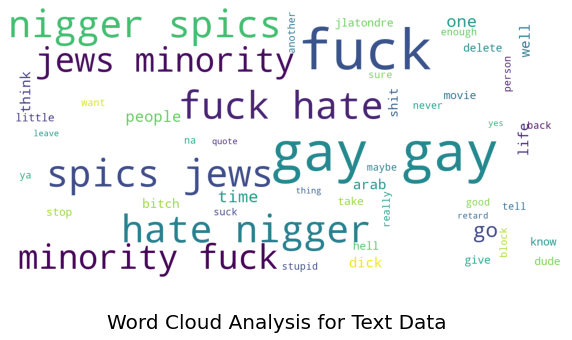

In [75]:
title = 'Word Cloud Analysis for Text Data'
wordcloud = WordCloud(
    background_color='white',
    stopwords=None,
    max_words=50,
    max_font_size=40, 
    scale=3,
    random_state=1 
).generate(" ".join(text_merged))

fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    
plt.imshow(wordcloud);

In [76]:
# Make one large list of the terms

freq_words = nltk.FreqDist(text_merged)
print(freq_words.most_common(100))

[('fuck', 384), ('as', 285), ('gay', 221), ('hate', 90), ('nigger', 79), ('spics', 79), ('jews', 79), ('minority', 79), ('like', 18), ('go', 17), ('get', 14), ('one', 11), ('time', 11), ('arab', 11), ('people', 10), ('na', 9), ('well', 8), ('think', 8), ('life', 8), ('mate', 8), ('dick', 8), ('shit', 7), ('bitch', 7), ('stop', 6), ('dude', 6), ('movie', 6), ('hell', 6), ('know', 6), ('take', 6), ('delete', 6), ('ever', 6), ('give', 6), ('little', 6), ('jlatondre', 6), ('stupid', 5), ('tell', 5), ('really', 5), ('change', 5), ('another', 5), ('good', 5), ('suck', 5), ('block', 5), ('want', 5), ('maybe', 5), ('ya', 5), ('never', 5), ('sure', 5), ('back', 5), ('person', 5), ('enough', 5), ('quote', 4), ('thing', 4), ('leave', 4), ('yes', 4), ('retard', 4), ('look', 4), ('son', 4), ('need', 4), ('reason', 4), ('asshole', 4), ('read', 4), ('ip', 4), ('book', 4), ('try', 4), ('vandalise', 4), ('vandal', 4), ('guy', 4), ('arabic', 4), ('say', 4), ('nobhead', 4), ('ear', 4), ('nothing', 4), ('

In [77]:
# Get the top 15 terms

freq_words.most_common(15)

[('fuck', 384),
 ('as', 285),
 ('gay', 221),
 ('hate', 90),
 ('nigger', 79),
 ('spics', 79),
 ('jews', 79),
 ('minority', 79),
 ('like', 18),
 ('go', 17),
 ('get', 14),
 ('one', 11),
 ('time', 11),
 ('arab', 11),
 ('people', 10)]

### Packing all functions in a pipeline for better organizing code:
### Let us create final model with complete data:

In [78]:
model = Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1,1),stop_words= None)),
                              ('svc', SVC(kernel='linear', C=1, gamma=10, class_weight='balanced', random_state=1))
                             ])
final_model = model.fit(X,y)